<a href="https://colab.research.google.com/github/danimellok/finance/blob/main/IBOVStockCorrelationReport_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions for Running the Code Locally:

1. **Install Required Packages**:
   If you don't have the required packages (`pandas`, `yfinance`, `matplotlib`, and `fpdf`) installed, you can use `pip` to install them.

   First, try installing the required packages using `pip`:

   ```
   `pip install pandas yfinance matplotlib fpdf`
   ```

2. **If You Don’t Have `pip` Installed**:
If `pip` is not installed on your local machine, you can follow these steps to install it:

1. Download the `get-pip.py` script using `curl`:

   ```
   curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
   ```

2. Run the script to install `pip`:

   ```
   python3 get-pip.py
   ```

3. Verify that `pip` was successfully installed by checking its version:

   ```
   pip --version
   ```

4. Now you can install the required packages using `pip`:

   ```
   pip install pandas yfinance matplotlib fpdf
   ```

3. **List of Required Packages**:
- `yfinance`
- `pandas`
- `matplotlib`
- `fpdf`

4. **Imports in the Code**:
Ensure the following imports are included at the top of your Python script:

```python
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from fpdf import FPDF
from fpdf import FPDF, XPos, YPos


In [43]:
!pip install --upgrade fpdf2

In [44]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from fpdf import FPDF
from fpdf import FPDF, XPos, YPos


There are two separated get_correlated_stocks functions. The first one tries to retrieve all the tickers information at once, however this can impose limits on the yfinance API. Adding to that, the first code does not handle very in case of missing variables. Thus, the second code handles the issue of the query by breaking the ticker list into different chuncks in order to not overload yfinance API, it also handles missing variables better.

Version 2.0 for second code: Added the function to promt the user how much years of data it wants to retrieve in order to calculate the correlation. Also, it automatically calculate the data range using todays date.

In [45]:
def get_ticker_summary(ticker):
    # Fetch company info using yfinance
    stock = yf.Ticker(ticker)
    info = stock.info

    # Extract relevant details
    full_name = info.get('longName', 'N/A')
    industry = info.get('industry', 'N/A')
    sector = info.get('sector', 'N/A')
    description = info.get('longBusinessSummary', 'N/A')

    # Additional info
    market_cap = info.get('marketCap', 'N/A')
    current_price = info.get('regularMarketPrice', 'N/A')
    dividend_yield = info.get('dividendYield', 'N/A')
    pe_ratio = info.get('forwardPE', 'N/A')
    earnings_date = info.get('nextEarningsDate', 'N/A')
    volume = info.get('volume', 'N/A')
    avg_volume = info.get('averageVolume', 'N/A')
    fifty_two_week_high = info.get('fiftyTwoWeekHigh', 'N/A')
    fifty_two_week_low = info.get('fiftyTwoWeekLow', 'N/A')

    return (full_name, industry, sector, description, market_cap, current_price, dividend_yield,
            pe_ratio, earnings_date, volume, avg_volume, fifty_two_week_high, fifty_two_week_low)

#FOR THE ADDITIONAL INFORMATION SECTION
def get_ticker_info(ticker):
    """Fetch company details like full name, industry, sector, and description for a given ticker."""
    stock = yf.Ticker(ticker)
    info = stock.info

    # Extract relevant details with defaults to 'N/A' if not available
    full_name = info.get('longName', 'N/A')
    industry = info.get('industry', 'N/A')
    sector = info.get('sector', 'N/A')
    description = info.get('longBusinessSummary', 'N/A')

    return full_name, industry, sector, description

def add_divider(pdf):
    """Adds a visual divider between different stock sections."""
    pdf.ln(5)
    pdf.set_line_width(0.5)
    pdf.line(10, pdf.get_y(), 200, pdf.get_y())
    pdf.ln(5)


In [48]:
###PDF REPORT
def create_pdf(base_ticker, most_correlated, least_correlated, years):
    # Initialize PDF
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    # Fetch stock information including logo
    full_name, industry, sector, description = get_ticker_info(base_ticker)

    # Title Section
    pdf.set_font("Helvetica", 'B', 16)
    pdf.cell(200, 10, f"Stock Correlation Report for {base_ticker}", new_x=XPos.LMARGIN, new_y=YPos.NEXT, align='C')
    # Subtitle (Date when report was generated and Range for correlation)
    current_date = datetime.now().strftime("%Y-%m-%d")
    pdf.ln(5)  # Space between title and subtitle
    pdf.set_font("Helvetica", '', 12)  # Set smaller font for subtitle
    pdf.cell(200, 10, f"Date when report was generated: {current_date}", new_x=XPos.LMARGIN, new_y=YPos.NEXT, align='C')
    pdf.cell(200, 10, f"Range for correlation calculation: {years} years", new_x=XPos.LMARGIN, new_y=YPos.NEXT, align='C')

    # Add ticker summary (new feature)
    (full_name, industry, sector, description, market_cap, current_price, dividend_yield,
     pe_ratio, earnings_date, volume, avg_volume, fifty_two_week_high, fifty_two_week_low) = get_ticker_summary(base_ticker)

    # Company and Industry Information Section
    pdf.set_font("Helvetica", 'B', 16)
    pdf.cell(200, 10, f"Stock Summary for {base_ticker}", new_x=XPos.LMARGIN, new_y=YPos.NEXT, align='C')

    pdf.ln(10)
    pdf.set_font("Helvetica", 'B', 14)
    pdf.cell(200, 10, "Company and Industry Information", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    # Add full name, industry, sector, description, and market cap
    pdf.ln(5)
    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(40, 10, "Full Name: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
    pdf.set_font("Helvetica", '', 12)
    pdf.cell(200, 10, full_name, new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(40, 10, "Industry: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
    pdf.set_font("Helvetica", '', 12)
    pdf.cell(200, 10, industry, new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(40, 10, "Sector: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
    pdf.set_font("Helvetica", '', 12)
    pdf.cell(200, 10, sector, new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(40, 10, "Market Cap: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
    pdf.set_font("Helvetica", '', 12)
    pdf.cell(200, 10, f"${market_cap:,}", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    # Company Description
    pdf.ln(10)
    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(40, 10, "Company Description: ", new_x=XPos.LMARGIN, new_y=YPos.NEXT)
    # Now use multi_cell to handle large text properly
    pdf.set_font("Helvetica", '', 12)
    pdf.multi_cell(200, 10, description)

    # Financial Information Section
    pdf.ln(10)
    pdf.set_font("Helvetica", 'B', 14)
    pdf.cell(200, 10, "Financial Information", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    # Add dividend yield, P/E ratio, volume, average volume, 52-week high, and 52-week low
    pdf.ln(5)
    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(40, 10, "Dividend Yield: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
    pdf.set_font("Helvetica", '', 12)
    pdf.cell(200, 10, f"{dividend_yield:.2%}" if dividend_yield != 'N/A' else 'N/A', new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(40, 10, "P/E Ratio: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
    pdf.set_font("Helvetica", '', 12)
    pdf.cell(200, 10, str(pe_ratio), new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    #pdf.set_font("Helvetica", 'B', 12)
    #pdf.cell(40, 10, "Volume: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
    #pdf.set_font("Helvetica", '', 12)
    #pdf.cell(200, 10, f"{volume:,}", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(40, 10, "Average Volume: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
    pdf.set_font("Helvetica", '', 12)
    pdf.cell(200, 10, f"{avg_volume:,}", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(40, 10, "52-Week High: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
    pdf.set_font("Helvetica", '', 12)
    pdf.cell(200, 10, f"${fifty_two_week_high}", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(40, 10, "52-Week Low: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
    pdf.set_font("Helvetica", '', 12)
    pdf.cell(200, 10, f"${fifty_two_week_low}", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    # Add a divider for clarity before showing correlation data
    pdf.ln(10)
    pdf.set_font("Helvetica", 'B', 14)
    pdf.cell(200, 10, f"Correlation Analysis for {base_ticker}", new_x=XPos.LMARGIN, new_y=YPos.NEXT)
    pdf.ln(10)
    pdf.set_font("Helvetica", 'B', 12)

    # Header titles for both sides
    pdf.cell(100, 10, "Most Correlated Stocks", align='C')  # Header for most correlated
    pdf.cell(100, 10, "Least Correlated Stocks", align='C', new_x=XPos.RIGHT, new_y=YPos.TOP)  # Header for least correlated

    pdf.ln(10)

    # Define maximum number of items (top 10) to display
    max_items = 10

    # Loop through the most and least correlated stocks
    for i in range(max_items):
        most_stock = list(most_correlated.items())[i]
        least_stock = list(least_correlated.items())[i]

        # Print most correlated stocks (left side)
        pdf.set_font("Helvetica", 'B', 12)  # Bold for the stock ticker
        pdf.cell(40, 10, f"{most_stock[0]}:", align='L')
        pdf.set_font("Helvetica", '', 12)  # Regular for the correlation value
        pdf.cell(60, 10, f"{most_stock[1]:.4f}", align='L')

        # Print least correlated stocks (right side)
        pdf.set_font("Helvetica", 'B', 12)  # Bold for the stock ticker
        pdf.cell(40, 10, f"{least_stock[0]}:", align='L', new_x=XPos.RIGHT)
        pdf.set_font("Helvetica", '', 12)  # Regular for the correlation value
        pdf.cell(60, 10, f"{least_stock[1]:.4f}", align='L', new_x=XPos.RIGHT, new_y=YPos.TOP)

        pdf.ln(10)


    # Save the bar charts as images
    most_correlated.plot(kind='bar', color='green')
    plt.title(f"Top 10 Most Correlated Stocks with {base_ticker}")
    plt.ylabel("Correlation")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("most_correlated.png")
    plt.close()

    least_correlated.plot(kind='bar', color='red')
    plt.title(f"Top 10 Least Correlated Stocks with {base_ticker}")
    plt.ylabel("Correlation")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("least_correlated.png")
    plt.close()

    # Add images to the PDF, stacking them vertically
    pdf.ln(10)
    pdf.image("most_correlated.png", x=10, y=None, w=180)  # Adjust width to fit the page
    pdf.ln(10)  # Add space between the images
    pdf.image("least_correlated.png", x=10, y=None, w=180)  # Adjust width to fit the page

     # Title for Additional Information Section
    pdf.ln(20)
    pdf.set_font("Helvetica", 'B', 14)
    pdf.cell(200, 10, "Additional Information for Correlated and Uncorrelated Stocks", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    # Most Correlated Stocks - Detailed Information
    pdf.ln(10)
    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(200, 10, "Most Correlated Stocks", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    for stock in most_correlated.keys():
        full_name, industry, sector, description = get_ticker_info(stock)


    # (Continue with displaying the stock information)
        # Check if there's enough space left for the section, else add a new page
        if pdf.get_y() > 260:
            pdf.add_page()

        pdf.ln(5)
        # Full Name in Bold
        pdf.set_font("Helvetica", 'B', 12)
        pdf.cell(40, 10, "Full Name: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
        pdf.set_font("Helvetica", '', 12)
        pdf.cell(150, 10, full_name, new_x=XPos.LMARGIN, new_y=YPos.NEXT)  # Adjust the width to 150 for margin handling

        # Industry, Sector, and Description
        pdf.set_font("Helvetica", 'B', 12)
        pdf.cell(40, 10, "Industry: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
        pdf.set_font("Helvetica", '', 12)
        pdf.cell(150, 10, industry, new_x=XPos.LMARGIN, new_y=YPos.NEXT)  # Adjust the width to 150

        pdf.set_font("Helvetica", 'B', 12)
        pdf.cell(40, 10, "Sector: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
        pdf.set_font("Helvetica", '', 12)
        pdf.cell(150, 10, sector, new_x=XPos.LMARGIN, new_y=YPos.NEXT)  # Adjust the width to 150

        pdf.set_font("Helvetica", 'B', 12)
        pdf.cell(40, 10, "Description: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
        pdf.set_font("Helvetica", '', 12)

        # Ensure that the multi_cell width is within the page's margins
        if pdf.get_y() > 250:
            pdf.add_page()

        pdf.multi_cell(150, 10, description)  # Adjust the width to 150 to avoid right margin cutoff

        # Add a divider between stocks
        add_divider(pdf)

    # Least Correlated Stocks - Detailed Information
    pdf.ln(10)
    pdf.set_font("Helvetica", 'B', 12)
    pdf.cell(200, 10, "Least Correlated Stocks", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    for stock in least_correlated.keys():
        full_name, industry, sector, description = get_ticker_info(stock)

        # Check if there's enough space left for the section, else add a new page
        if pdf.get_y() > 260:
            pdf.add_page()

        pdf.ln(5)
        # Full Name in Bold
        pdf.set_font("Helvetica", 'B', 12)
        pdf.cell(40, 10, "Full Name: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
        pdf.set_font("Helvetica", '', 12)
        pdf.cell(150, 10, full_name, new_x=XPos.LMARGIN, new_y=YPos.NEXT)  # Adjust the width to 150

        # Industry, Sector, and Description
        pdf.set_font("Helvetica", 'B', 12)
        pdf.cell(40, 10, "Industry: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
        pdf.set_font("Helvetica", '', 12)
        pdf.cell(150, 10, industry, new_x=XPos.LMARGIN, new_y=YPos.NEXT)  # Adjust the width to 150

        pdf.set_font("Helvetica", 'B', 12)
        pdf.cell(40, 10, "Sector: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
        pdf.set_font("Helvetica", '', 12)
        pdf.cell(150, 10, sector, new_x=XPos.LMARGIN, new_y=YPos.NEXT)  # Adjust the width to 150

        pdf.set_font("Helvetica", 'B', 12)
        pdf.cell(40, 10, "Description: ", new_x=XPos.RIGHT, new_y=YPos.TOP)
        pdf.set_font("Helvetica", '', 12)

        # Ensure that the multi_cell width is within the page's margins
        if pdf.get_y() > 250:
            pdf.add_page()

        pdf.multi_cell(150, 10, description)  # Adjust the width to 150 to avoid right margin cutoff

        # Add a divider between stocks
        add_divider(pdf)



    # Output the PDF
    pdf.output(f"{base_ticker}_correlation_report.pdf")
    print(f"PDF report saved as {base_ticker}_correlation_report.pdf")


Please enter a stock ticker (e.g., MGLU3.SA): PETR4.SA
Enter the number of years of data you want to use for correlation (e.g., 3): 3


[**********            20%                       ]  4 of 20 completed

[*****************     35%                       ]  7 of 20 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[**********************75%***********            ]  15 of 20 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[*********************100%***********************]  20 of 20 completed
[**********************85%****************       ]  17 of 20 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[*********************100%***********************]  20 of 20 completed
[*****************     35%                       ]  7 of 20 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[**********************75%***********            ]  15 of 20

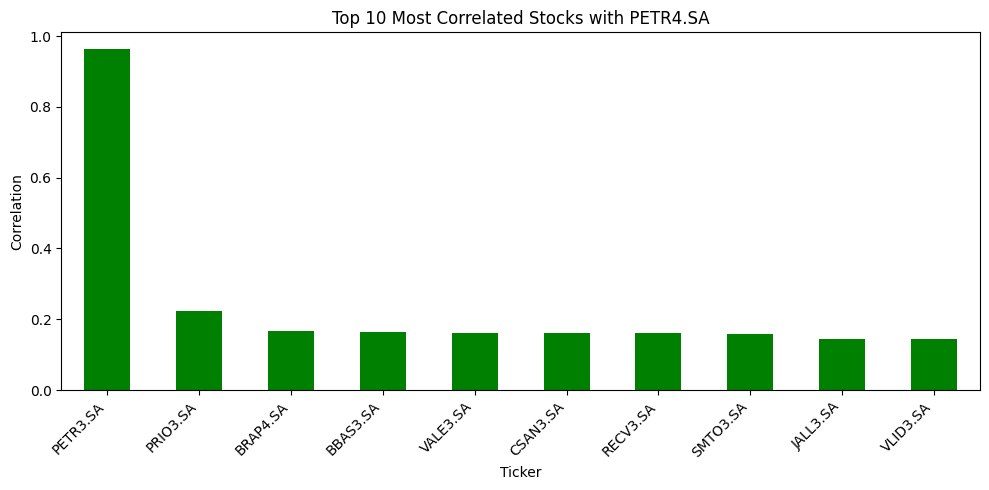

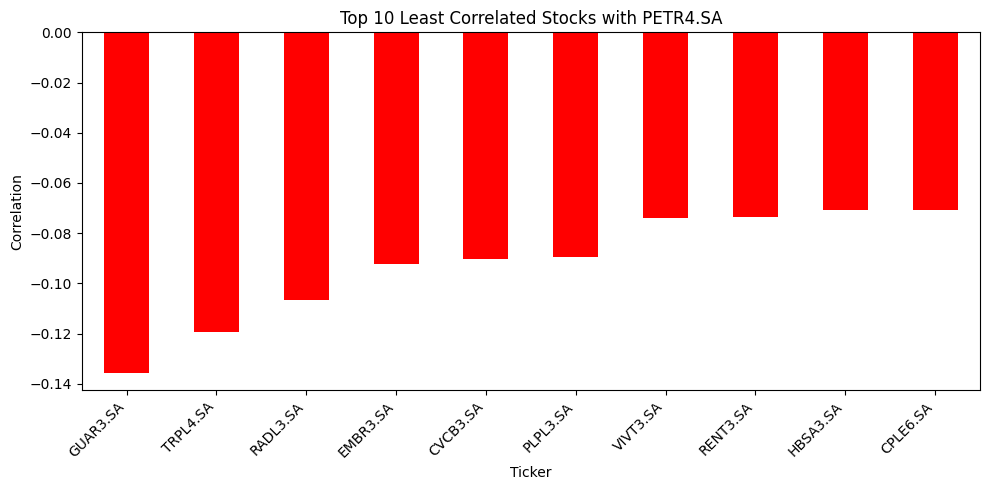

PDF report saved as PETR4.SA_correlation_report.pdf

10 Most Correlated Stocks with PETR4.SA:
Ticker
PETR3.SA    0.962548
PRIO3.SA    0.224253
BRAP4.SA    0.167721
BBAS3.SA    0.163659
VALE3.SA    0.162315
CSAN3.SA    0.162310
RECV3.SA    0.160897
SMTO3.SA    0.158062
JALL3.SA    0.145168
VLID3.SA    0.145106
Name: PETR4.SA, dtype: float64

10 Least Correlated Stocks with PETR4.SA:
Ticker
GUAR3.SA   -0.135750
TRPL4.SA   -0.119215
RADL3.SA   -0.106538
EMBR3.SA   -0.092329
CVCB3.SA   -0.090139
PLPL3.SA   -0.089602
VIVT3.SA   -0.073831
RENT3.SA   -0.073732
HBSA3.SA   -0.070953
CPLE6.SA   -0.070590
Name: PETR4.SA, dtype: float64


In [49]:
def plot_bar_chart(most_correlated, least_correlated, base_ticker):
    # Bar plot for most correlated stocks
    plt.figure(figsize=(10, 5))
    most_correlated.plot(kind='bar', color='green')
    plt.title(f"Top 10 Most Correlated Stocks with {base_ticker}")
    plt.ylabel("Correlation")
    plt.xticks(rotation=45, ha="right")  # Rotate the x-axis labels for better readability
    plt.tight_layout()  # Ensure the layout adjusts to show everything properly
    plt.savefig("most_correlated.png")
    plt.show()

    # Bar plot for least correlated stocks
    plt.figure(figsize=(10, 5))
    least_correlated.plot(kind='bar', color='red')
    plt.title(f"Top 10 Least Correlated Stocks with {base_ticker}")
    plt.ylabel("Correlation")
    plt.xticks(rotation=45, ha="right")  # Rotate the x-axis labels for better readability
    plt.tight_layout()  # Ensure the layout adjusts to show everything properly
    plt.savefig("least_correlated.png")
    plt.show()


def get_correlated_stocks(tickers, base_ticker, years):
    # Calculate the start date based on the number of years provided by the user
    end_date = datetime.today()
    start_date = end_date - timedelta(days=years*365)  # Rough approximation of years to days

    print(f"Downloading stock data from {start_date.date()} to {end_date.date()}, please wait...")

    valid_tickers = []
    failed_tickers = []
    data = pd.DataFrame()

    # Split tickers into smaller chunks to avoid timeouts
    chunk_size = 20
    for i in range(0, len(tickers), chunk_size):
        try:
            chunk = tickers[i:i+chunk_size]
            chunk_data = yf.download(chunk, start=start_date.strftime('%Y-%m-%d'),
                                     end=end_date.strftime('%Y-%m-%d'))['Adj Close']
            data = pd.concat([data, chunk_data], axis=1)
            valid_tickers.extend(chunk_data.columns)
        except Exception as e:
            print(f"Error with tickers {chunk}: {e}")
            failed_tickers.extend(chunk)

    # Handle missing data issues
    data.index = data.index.tz_localize(None)
    returns = data.pct_change(fill_method=None).dropna()

    # Calculate the correlation matrix
    corr_matrix = returns.corr()

    # Check if the base_ticker is in the data
    if base_ticker not in corr_matrix.columns:
        print(f"Error: Ticker {base_ticker} not found in the dataset.")
        return

    # Extract correlations for the base_ticker
    correlations = corr_matrix[base_ticker].drop(base_ticker)  # Drop self-correlation

    # Sort the correlations
    most_correlated = correlations.sort_values(ascending=False).head(10)
    least_correlated = correlations.sort_values(ascending=True).head(10)

    # Plot the bar charts
    plot_bar_chart(most_correlated, least_correlated, base_ticker)

    # Create PDF report
    create_pdf(base_ticker, most_correlated, least_correlated, years)

    # Display results
    print(f"\n10 Most Correlated Stocks with {base_ticker}:")
    print(most_correlated)

    print(f"\n10 Least Correlated Stocks with {base_ticker}:")
    print(least_correlated)

    # Display any tickers that failed to download
    if failed_tickers:
        print(f"\nFailed to download data for the following tickers: {failed_tickers}")

# Main function
if __name__ == "__main__":
    tickers = ['TTEN3.SA', 'ABCB4.SA', 'AERI3.SA', 'AESB3.SA', 'ALOS3.SA', 'ALPA4.SA', 'ALUP11.SA', 'ABEV3.SA',
               'AMBP3.SA', 'ANIM3.SA', 'ARML3.SA', 'ASAI3.SA', 'AURE3.SA', 'AZEV4.SA', 'AZUL4.SA', 'AZZA3.SA',
               'B3SA3.SA', 'BPAN4.SA', 'BRSR6.SA', 'BBSE3.SA', 'BMOB3.SA', 'BLAU3.SA', 'SOJA3.SA', 'BBDC3.SA',
               'BBDC4.SA', 'BRAP4.SA', 'BBAS3.SA', 'AGRO3.SA', 'BRKM5.SA', 'BRFS3.SA', 'BPAC11.SA',
               'CXSE3.SA', 'CAML3.SA', 'CRFB3.SA', 'BHIA3.SA', 'CBAV3.SA', 'CCRO3.SA', 'CEAB3.SA', 'CMIG4.SA',
               'CLSA3.SA', 'COGN3.SA', 'CSMG3.SA', 'CPLE6.SA', 'CSAN3.SA', 'CPFE3.SA', 'CMIN3.SA', 'CURY3.SA',
               'CVCB3.SA', 'CYRE3.SA', 'DASA3.SA', 'DXCO3.SA', 'PNVL3.SA', 'DIRR3.SA', 'ECOR3.SA', 'ELET3.SA',
               'ELET6.SA', 'EMBR3.SA', 'ENGI11.SA', 'ENEV3.SA', 'EGIE3.SA', 'EQTL3.SA', 'EVEN3.SA', 'EZTC3.SA',
               'FESA4.SA', 'FLRY3.SA', 'FRAS3.SA', 'GFSA3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GGPS3.SA', 'GRND3.SA',
               'NTCO3.SA', 'SBFG3.SA', 'GUAR3.SA', 'HAPV3.SA', 'HBSA3.SA', 'HYPE3.SA', 'IGTI11.SA', 'INTB3.SA',
               'MYPK3.SA', 'RANI3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JALL3.SA', 'JBSS3.SA', 'JHSF3.SA',
               'JSLG3.SA', 'KEPL3.SA', 'KLBN11.SA', 'LAVV3.SA', 'RENT3.SA', 'LOGG3.SA', 'LREN3.SA', 'LWSA3.SA',
               'MDIA3.SA', 'MGLU3.SA', 'POMO4.SA', 'MRFG3.SA', 'CASH3.SA', 'LEVE3.SA', 'MILS3.SA', 'BEEF3.SA',
               'MTRE3.SA', 'MDNE3.SA', 'MOVI3.SA', 'MRVE3.SA', 'MLAS3.SA', 'MULT3.SA', 'OPCT3.SA', 'ODPV3.SA',
               'ONCO3.SA', 'ORVR3.SA', 'PCAR3.SA', 'PGMN3.SA', 'PETR3.SA', 'PETR4.SA', 'RECV3.SA', 'PRIO3.SA',
               'PETZ3.SA', 'PLPL3.SA', 'PTBL3.SA', 'POSI3.SA', 'QUAL3.SA', 'LJQQ3.SA', 'RADL3.SA', 'RAIZ4.SA',
               'RAPT4.SA', 'RCSL3.SA', 'RDOR3.SA', 'ROMI3.SA', 'RAIL3.SA', 'SBSP3.SA', 'SAPR11.SA', 'SANB11.SA',
               'STBP3.SA', 'SMTO3.SA', 'SEER3.SA', 'SRNA3.SA', 'CSNA3.SA', 'SIMH3.SA', 'SMFT3.SA',
               'SUZB3.SA', 'TAEE11.SA', 'TASA4.SA', 'TGMA3.SA', 'VIVT3.SA', 'TEND3.SA', 'TIMS3.SA', 'TOTS3.SA',
               'TRPL4.SA', 'TRIS3.SA', 'TUPY3.SA', 'UGPA3.SA', 'UNIP6.SA', 'USIM3.SA', 'USIM5.SA', 'VALE3.SA',
               'VLID3.SA', 'VAMO3.SA', 'VBBR3.SA', 'VIVA3.SA', 'VVEO3.SA', 'VULC3.SA', 'WEGE3.SA', 'PORT3.SA',
               'WIZC3.SA', 'YDUQ3.SA', 'ZAMP3.SA']

     # Prompt user for the ticker
    user_ticker = input("Please enter a stock ticker (e.g., MGLU3.SA): ").upper()

    # Add the user's ticker to the list if it's not already there
    if user_ticker not in tickers:
        tickers.append(user_ticker)

    while True:
      try:
          years = int(input("Enter the number of years of data you want to use for correlation (e.g., 3): "))
          if years > 0:
              break
          else:
              print("Please enter a positive number.")
      except ValueError:
          print("Invalid input. Please enter a valid number.")

    # Call the function to get correlated stocks
    get_correlated_stocks(tickers, user_ticker, years)